##  "**Estadística descriptiva desocupación y edad**"  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('base_final.csv')

In [3]:
print(df[0:5])

     ao  clave_ent             edo  homicidio  robocasa  robocalle  robocarro  \
0  2015          1  Aguascalientes        211      2525       1754       1995   
1  2016          1  Aguascalientes        233      2459       1353       3110   
2  2017          1  Aguascalientes        258      3327       1949       3624   
3  2018          1  Aguascalientes        283      3355       2216       3309   
4  2019          1  Aguascalientes        269      2817       1780       2399   

   extorsion  tasa_hom  tasa_rcasa  ...  desocupa  edad15a24  edad25a34  \
0         39     15.84      189.59  ...  4.577627     255649     211782   
1         70     17.19      181.43  ...  3.973306     258733     217183   
2        121     18.75      241.83  ...  3.599153     260495     222453   
3        138     20.28      240.36  ...  3.626284     261963     227600   
4        116     19.00      199.02  ...  3.532177     263225     232527   

   edad35a44  edad45mas  pob_tot         pibe   ingreso  pob_e

### "Desocupación "

In [4]:
sns.set(style="ticks")

" Se incluye en la gráfica de cada estado la desocupación promedio, el valor mínimo y máximo de 2015 a 2019 a nivel nacional "

In [5]:
des_min = df["desocupa"].min()

In [6]:
des_max = df["desocupa"].max() 

In [7]:
des_med = df["desocupa"].mean()

" Se genera gráfica sobre la evolución de la desocupación por entidad federativa, con base en 
http://seaborn.pydata.org/examples/many_facets.html,  https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

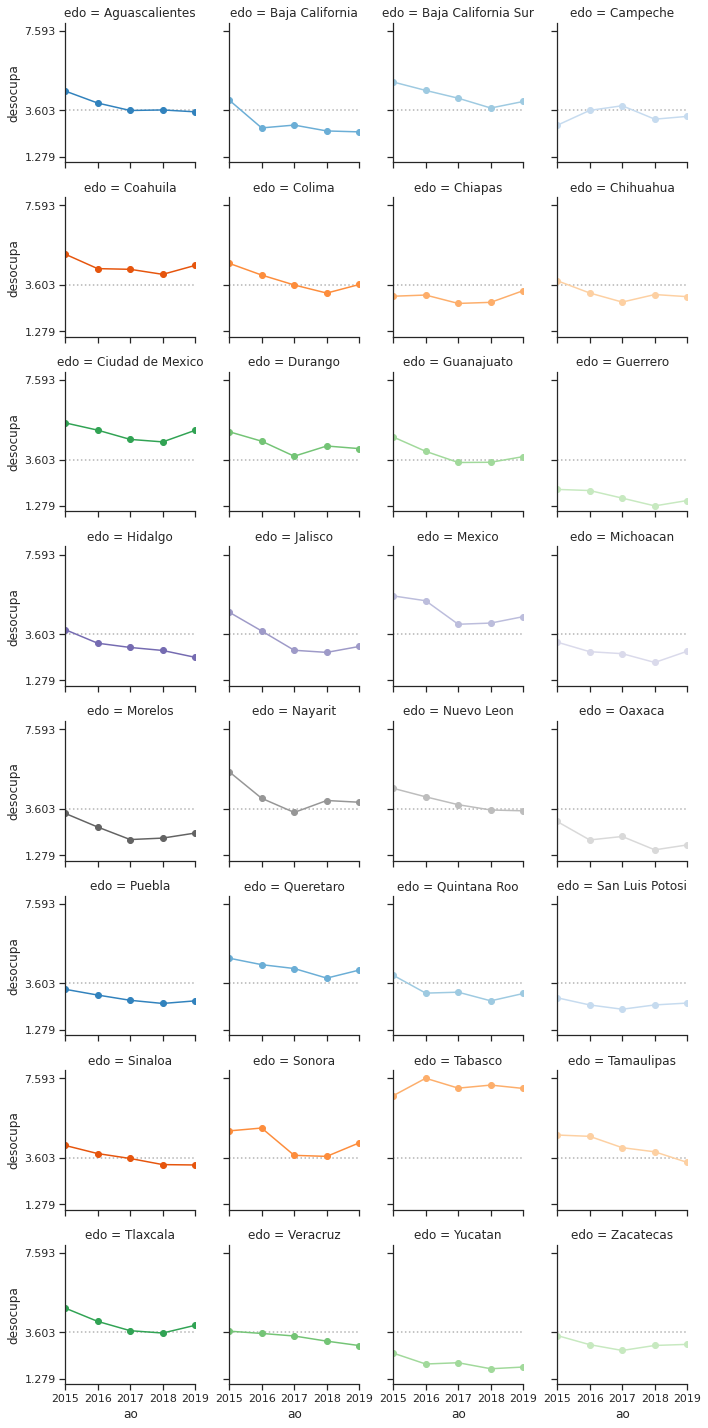

In [10]:
grid = sns.FacetGrid(df, col="edo", hue="edo", palette="tab20c",
                     col_wrap=4, height=2.5) 
grid.map(plt.axhline, y=des_med, ls=":", c="0.7") 
grid.map(plt.plot, "ao", "desocupa",  marker="o") 
grid.set(xticks=np.arange(2015,2020), yticks=[des_min, des_med,des_max],
         xlim=(2015, 2019),ylim=(1, 8)) 
grid.fig.tight_layout(w_pad=0.5)

La tasa de desocupación presenta una evolución distinta por entidad federativa de 2015 a 2019. 
Guerrero, Oaxaca, Yucatán destacan por tener tasas de desocupación por debajo de la media nacional,
lo cual podría estar relacionado con la forma de captar la variables. De acuerdo al INEGI, la tasa de desocupación 
se refiere al porcentaje de la Población Económicamente Activa (PEA) que no trabajó siquiera una hora durante la semana de
referencia de la encuesta pero manifestó su disposición para hacerlo e hizo alguna actividad por obtener empleo. Por el contrario, el estado de Tabasco muestra una tasa de desocupación de alrededor del 7%, la máxima comparada con el resto de entidades federativas.

### " Edad de la población: 15 a 24 años y 25 a 34 años "

La evidencia y la literatura señalan que la edad más probablie para cometer delitos se encuentra entre los 15 y 35 años,
por tal razón elegimos dos grupos de edad para ser incluidos en el análisis. El primer grupo de 15 a 24 años y el segundo de 25 a 34 años. Con el fin de realizar una comparación entre entidades federativas, de 2015 a 2019, presentamos la proporción de población de estos grupos de edad respecto al total de población de cada entidad.

In [12]:
df["prop15a24"]=df["edad15a24"]*100/df["pob_tot"]

In [13]:
df["prop25a34"]=df["edad25a34"]*100/df["pob_tot"]

In [14]:
print(df[0:2])

     ao  clave_ent             edo  homicidio  robocasa  robocalle  robocarro  \
0  2015          1  Aguascalientes        211      2525       1754       1995   
1  2016          1  Aguascalientes        233      2459       1353       3110   

   extorsion  tasa_hom  tasa_rcasa  ...  edad25a34  edad35a44  edad45mas  \
0         39     15.84      189.59  ...     211782     175356     296621   
1         70     17.19      181.43  ...     217183     178187     308198   

   pob_tot         pibe   ingreso  pob_ext  pobreza  prop15a24  prop25a34  
0  1331825  198220.6406  207024.0     2.09    31.58  19.195390  15.901639  
1  1355321  211672.4688  203879.0     2.30    28.22  19.090164  16.024469  

[2 rows x 25 columns]


In [15]:
p1524_min = df["prop15a24"].min()
p1524_max = df["prop15a24"].max() 
p1524_med = df["prop15a24"].mean()

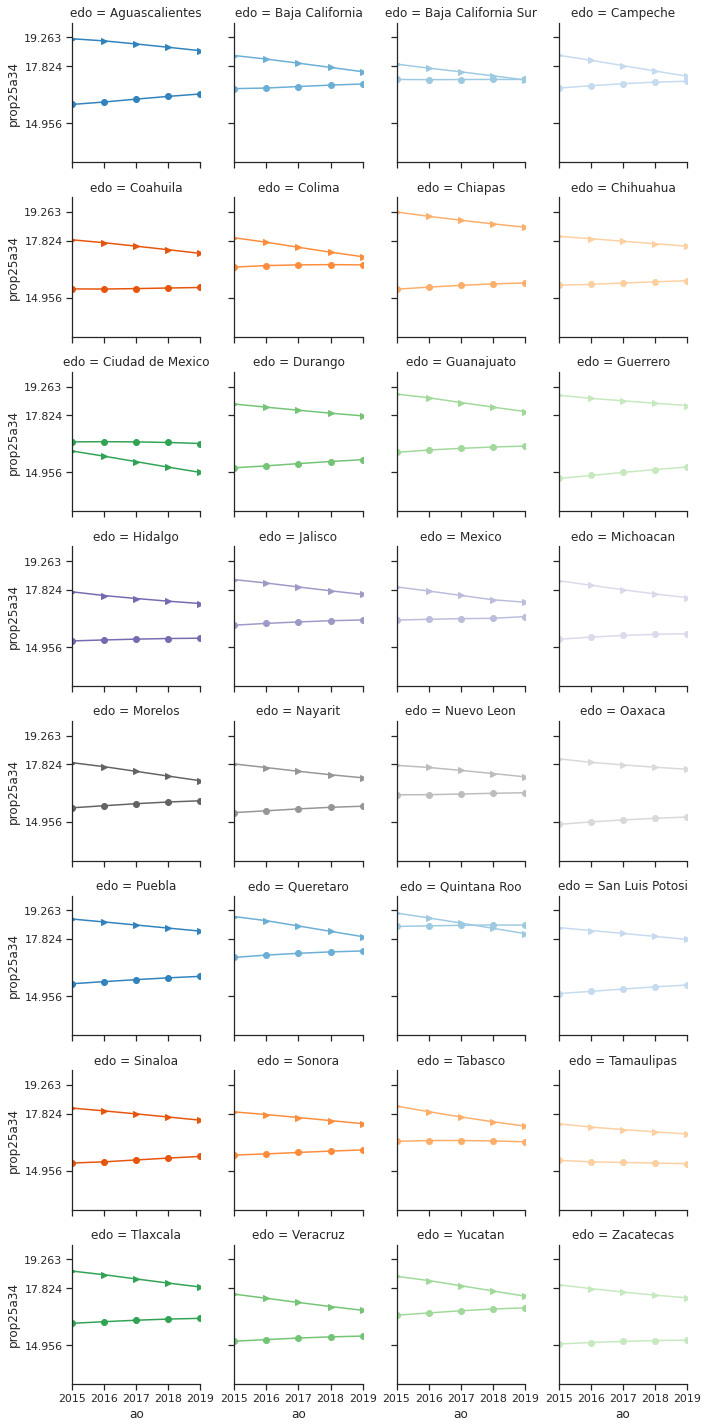

In [16]:
grid = sns.FacetGrid(df, col="edo", hue="edo", palette="tab20c",
                     col_wrap=4, height=2.5)
grid.map(plt.axhline, y=des_med, ls=":", c="0.7") 
grid.map(plt.plot, "ao", "prop15a24",  marker=">")
grid.map(plt.plot, "ao", "prop25a34",  marker="o")
grid.set(xticks=np.arange(2015,2020), yticks=[p1524_min, p1524_med,p1524_max],
         xlim=(2015, 2019),ylim=(13, 20)) 
grid.fig.tight_layout(w_pad=0.5)

#### " Edad de la población vs desocupación "

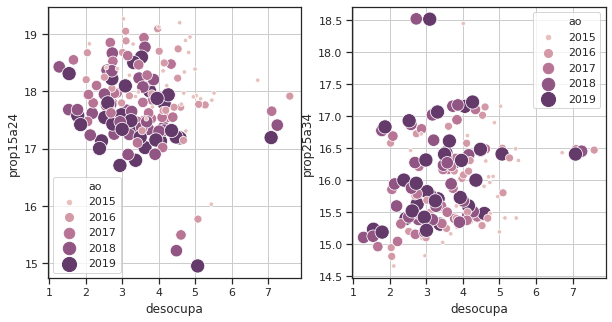

In [17]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.scatterplot(x="desocupa", y="prop15a24",
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=df)
plt.grid(True)

plt.subplot(1,2,2)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="desocupa", y="prop25a34",
                     hue="ao", size="ao",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=df)
plt.grid(True)

La desocupación, la proporción de población de 15 a 24 años y la proporción de población de 25 a 34 años tienen una relación diversa entre los estados. La varianza observada entre estas variables se torna útil para la estimación del modelo en el que incluiremos estas variables.

#### " Población de 25 a 34 años vs robo de autos "

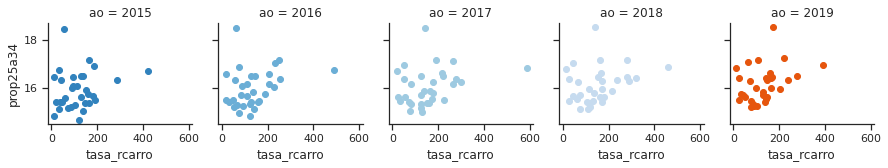

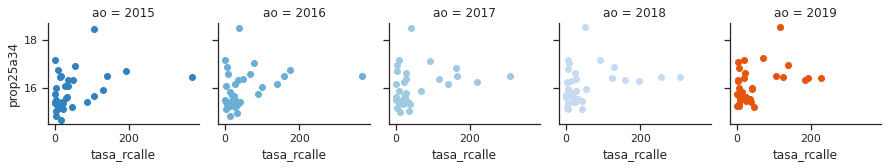

In [18]:
grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, "tasa_rcarro", "prop25a34",  marker="o");
grid = sns.FacetGrid(df, col="ao", hue="ao", palette="tab20c",
                     col_wrap=5, height=2.5)
grid.map(plt.scatter, "tasa_rcalle", "prop25a34",  marker="o");


Las relación entre robo a transeúnte (por cada 100 mil habitantes, tasa_rcalle), robo de vehículos (por cada 100 mil habitantes, tasa_rcarro) y población de 25 a 34 años difiere por entidad federativa, presenta ligera evolución en el periodo analizado y muestra una entidad con comportamiento que sobresale del resto, la Ciudad de México (presenta el máximo robo a casa habitación). 